
# Project: Investigate a Dataset - [No Show Appointment Data]
## Table of Contents
* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions

## Introduction

## Data description
   This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ 

## Questions for analysis
* Does Older People show up for Appointments compared to younger people
* Does having a scholarship,Diabetes and Age influence showing up for medical appointments

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data Wrangling

In [2]:
# Loading data set (No show Appointments data) 
df= pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
# checking dataset head 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# getting info on data set to check for null values and dtypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Data Cleaning
* convert PatientID and ApppointmentID from float to Object type since it is not a real number
* covert AppointmentDay and ScheduledDay from Object to datetime type since it is a date 

In [4]:
# performing the necessary cleaning
df["PatientId"]=df["PatientId"].astype("object")
df["AppointmentID"]=df["AppointmentID"].astype("object")
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df["No-show_label"]=df["No-show"].replace(["Yes","No"],[0,1]) # Creating a new column in dataframe to label Yes and No as 0(dont show up) and 1(show up)
# confirming Changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

## Exploratory Data Analysis

In [5]:
# statistical summary
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show_label
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


## Research Question 1 (Answer)
* Does Older People show up for Appointments compared to younger people

****************************************************************************************************
percentage of Old People showing up for appointments:  84.49520899875017 %
****************************************************************************************************
****************************************************************************************************
percentage of Young People showing up for appointments:  79.10429128738622 %
****************************************************************************************************


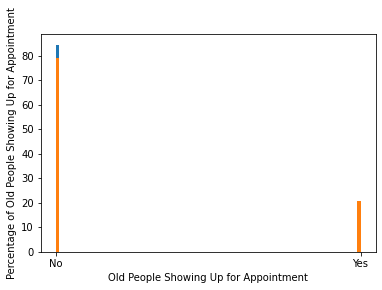

In [6]:
# Building a function to compares old and young people that shows up for  appointments
def old_young_comparison():
    maska = df["Age"]>=65 # making Old people(people greater than or equal to 65)
    df_Old = df[maska]
    maskb = df["Age"]<65  # making Young people(people less than  65)
    df_Young = df[maskb]
    old_group = df_Old.groupby("No-show") # grouping old and young people data by the number of appointments show up
    O_No = old_group.get_group("No")
    Young_group = df_Young.groupby("No-show")
    Y_No = Young_group.get_group("No")
    print("*"*100)
    print("percentage of Old People showing up for appointments: ",(len(O_No)/len(df_Old))*100,"%")
    print("*"*100)
    print("*"*100)
    print("percentage of Young People showing up for appointments: ",(len(Y_No)/len(df_Young))*100,"%")
    print("*"*100)
    plt.hist(df_Old["No-show"],density=True,stacked=True,bins=100)
    plt.hist(df_Young["No-show"],density=True,stacked=True,bins=100)
    plt.xlabel("Old People Showing Up for Appointment")
    plt.ylabel("Percentage of Old People Showing Up for Appointment")
    

    
old_young_comparison()    

#### Findings
* Old People i.e people of age 65 and above show up for appointments with a percentage of 85% approximately
* Young people i.e people of age less than 65 show up for appointments with a percentage of 75% approximately
* On an average More Old people show up for appointments compared to young people

###  Research Question 2 (Answer)
* Does having a Scholarship influence showing up for medical appointments

In [7]:
df.corr() # checking the correlation coefficient between Scholarships and Noshow_label

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show_label
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.060319
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196
Handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076
SMS_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431
No-show_label,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,-0.126431,1.000000


In [8]:
print("The correlation between Scholarships and Noshow_label : ", df.corr()["No-show_label"][1])

The correlation between Scholarships and Noshow_label :  -0.029135031314095


C:\Users\SAMSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship betwwen having a Scholarship and Showing up for medical appointments')

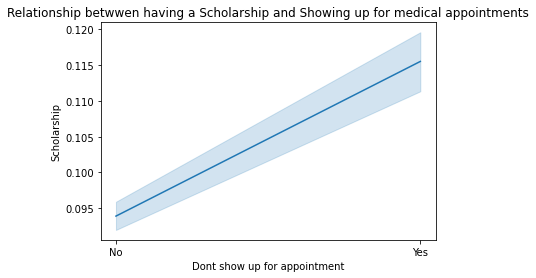

In [9]:
sb.lineplot(df["No-show"],df["Scholarship"])
plt.xlabel("Dont show up for appointment")
plt.title("Relationship betwwen having a Scholarship and Showing up for medical appointments")

### Regression Analysis

In [10]:
Y=df["No-show_label"]
X=df[["Scholarship","Age","Diabetes"]]
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          No-show_label   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     155.5
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          1.31e-100
Time:                        18:04:09   Log-Likelihood:                -55721.
No. Observations:              110527   AIC:                         1.115e+05
Df Residuals:                  110523   BIC:                         1.115e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7636      0.002    323.081      0.000       0.759       0.768
Scholarship    -0.0320      0.004     -7.880      0.000      -0.040      -0.024
Age             0.0010   5.47e-05     18.688      0.000       0.001       0.001
Diabetes       -0.0041      0.005     -0.838      0.402      -0.014       0.005
==============================================================================
Omnibus:                    22666.429   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40278.466
Skew:                          -1.475   Prob(JB):                         0.00
Kurtosis:                       3.202   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Findings
* Scholarship is positively correlated with No-show
* Age is Negatively correlated with No-show
* Diabetes is Negatively Correlated with No-show
* Having a Scholarship influences showing up for appointments (Negatively) (effect= -0.002)(significant)
* Ages influences showing up for appointments (Positively) (effect = 0.0010) (significant)
* Having Diabetes influences showing up for appointments (Negatively) (effect= -0.0041) (significant)

## Conclusions
Based on the above findings we can conclude that older people show up more for appointments compared to younger people and also people with scholarships or people who have diabetes causes decrease in the level of show ups for appointments while the ages of people causes increase in level of show ups for appointments, but people with diabetes are positive correlated with show ups which implies that more people with diabetes tend to show up for appointments.

###                              References   
  N/A